### Fusion des bases de données `df_regressions` et `ee_bp19`

In [1]:
import pandas as pd

In [5]:
df1 = pd.read_csv("df_regressions.csv")
df2 = pd.read_csv("ee_bp19.csv")

# Fusion des deux dataframes
df = df1.merge(df2, on="Dep")

In [6]:
df.head()

,Dep,D9/D1,Rev_median,Ndip25_34,intens_pauvr,chom19,chom24,Dem_empl15_64,tauxpauvrete,G,C,D
0,Ain,3.5,24810.0,11.5,20.4,6.050,5.600,10.3,10.8,0.230103,0.327883,40.82
1,Aisne,3.1,20920.0,17.6,20.1,11.800,10.500,15.8,18.8,0.179010,0.237194,53.68
2,Allier,3.0,21500.0,14.8,20.1,9.050,7.925,13.7,16.2,0.206867,0.306293,44.95
3,Alpes-de-Haute-Provence,3.2,21790.0,12.7,20.5,10.075,7.925,16.0,17.1,0.262900,0.291808,40.82
4,Hautes-Alpes,3.0,22010.0,9.7,19.9,7.925,6.225,15.8,14.7,0.279853,0.313522,37.56


### Méthode K-means

In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# --- 2. On garde les colonnes numériques pour le kmeans
cols_kmeans = [
    "D9/D1", "Rev_median", "Ndip25_34", "intens_pauvr",
    "chom19", "chom24", "Dem_empl15_64", "tauxpauvrete",
    "G", "C", "D"
]

#X = df[cols_kmeans]
X = df2[["G", "C", "D"]]

# --- 3. Normalisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 4. K-means
k = 3   # par exemple, tu peux choisir 3 clusters (gauche / centre / droite)
kmeans = KMeans(n_clusters=k, random_state=0)
df2["cluster"] = kmeans.fit_predict(X_scaled)

# --- 5. Résultat
print(df2[["Dep", "cluster"]])


                        Dep  cluster
0                       Ain        0
1                     Aisne        1
2                    Allier        1
3   Alpes-de-Haute-Provence        0
4              Hautes-Alpes        0
..                      ...      ...
95               Val-d'Oise        2
96               Guadeloupe        2
97               Martinique        2
98                   Guyane        2
99               La Réunion        0

[100 rows x 2 columns]


In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

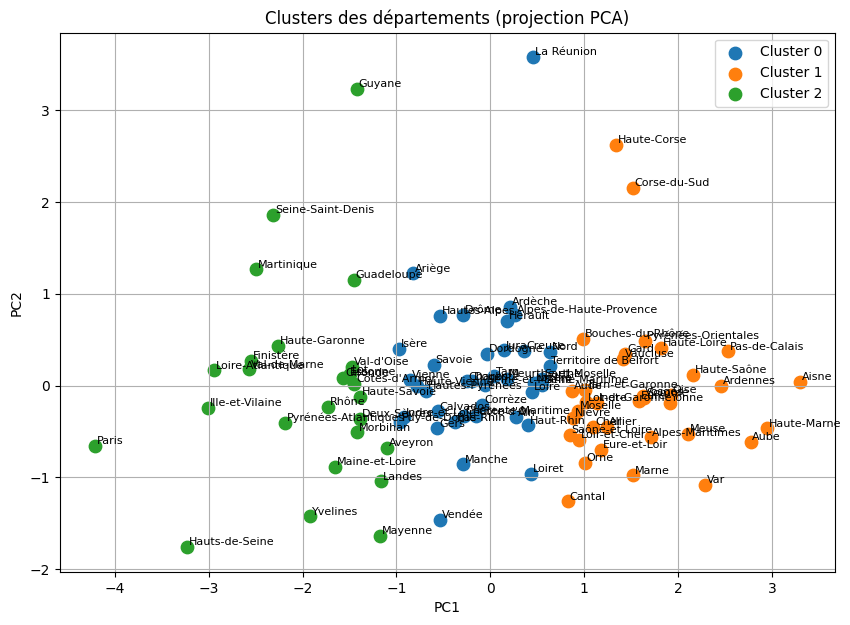

In [17]:
# --- 5. PCA pour projeter en 2D ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df2["PC1"] = X_pca[:, 0]
df2["PC2"] = X_pca[:, 1]

# --- 6. Visualisation ---
plt.figure(figsize=(10, 7))
for cluster in df2["cluster"].unique():
    subset = df2[df2["cluster"] == cluster]
    plt.scatter(subset["PC1"], subset["PC2"], label=f"Cluster {cluster}", s=80)

# Ajouter les labels (noms des départements)
for i in range(len(df2)):
    plt.text(df2["PC1"][i] + 0.02, df2["PC2"][i] + 0.02, df2["Dep"][i], fontsize=8)

plt.title("Clusters des départements (projection PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()

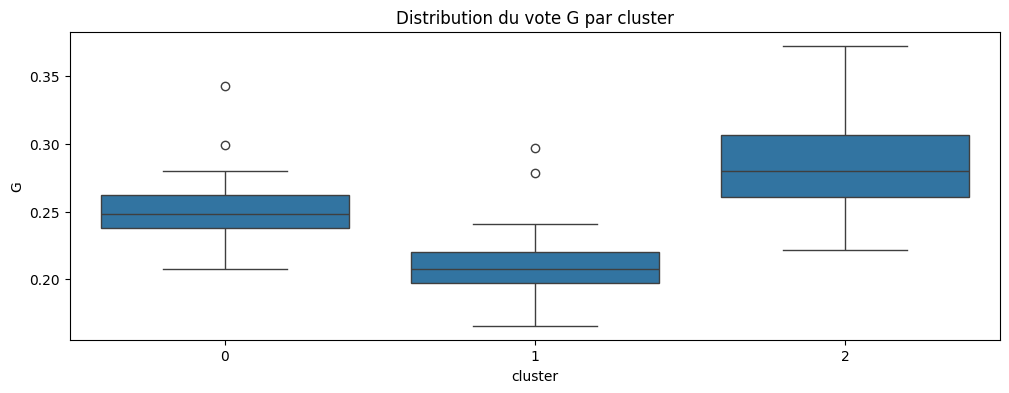

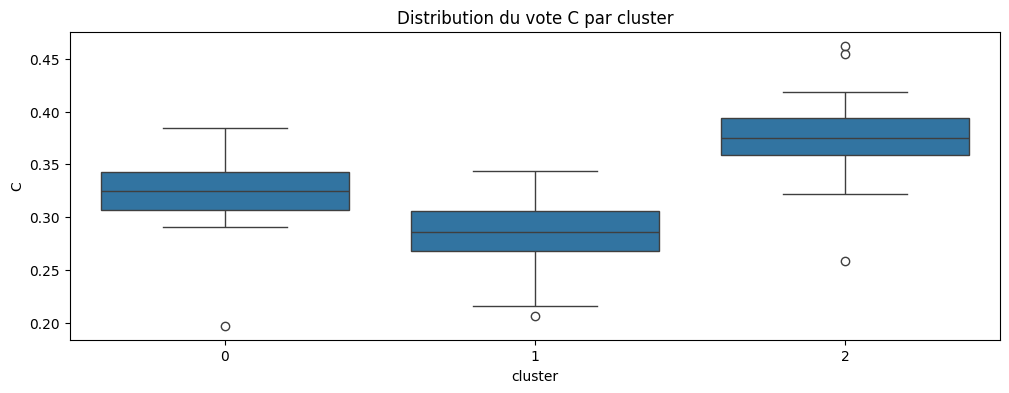

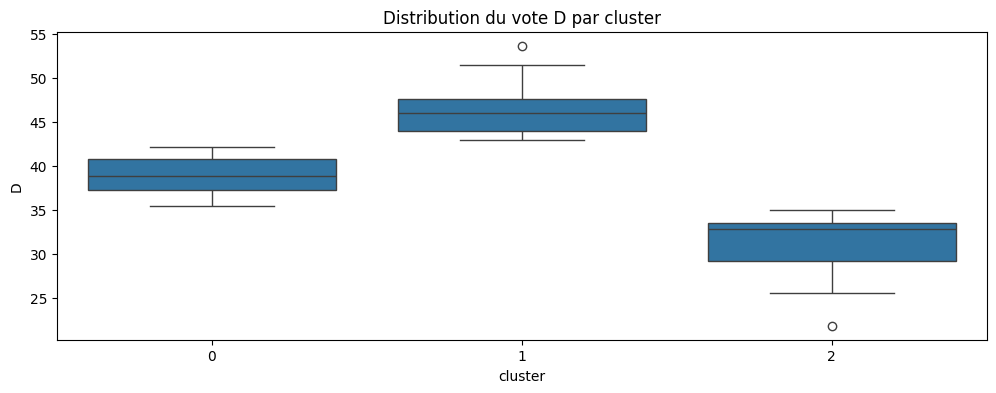

In [19]:
import seaborn as sns

plt.figure(figsize=(12,4))
sns.boxplot(data=df2, x="cluster", y="G")
plt.title("Distribution du vote G par cluster")
plt.show()

plt.figure(figsize=(12,4))
sns.boxplot(data=df2, x="cluster", y="C")
plt.title("Distribution du vote C par cluster")
plt.show()

plt.figure(figsize=(12,4))
sns.boxplot(data=df2, x="cluster", y="D")
plt.title("Distribution du vote D par cluster")
plt.show()
